In [ ]:
# Importing Packages
import math, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm

In [ ]:
# Function for 2-D and 3-D Plot
def Rossler_ode_plot_components (x, y, z):
    plt.figure (figsize = (8.5,8.5))
    plt.plot ( t, x, linewidth = 1, color = 'b' )
    plt.plot ( t, y, linewidth = 1, color = 'r' )
    plt.plot ( t, z, linewidth = 1, color = 'g' )
    plt.grid ( True )
    plt.xlabel ( '<--- Time --->' )
    plt.ylabel ( '<--- x(t), y(t), z(t) --->' )
    plt.title ( 'Rossler Time Series Plot' )

    plt.legend(['x','y','z'], loc = 2)
    plt.savefig ( 'Rossler_ode_components.png' )
    plt.show ( )
    return

def Rossler_ode_plot_3d (x, y, z):
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.add_subplot(projection='3d')
    ax.plot ( x, y, z, linewidth = 0.5, color = 'orangered' )
    ax.set_zlim(0,18)
    ax.grid ( True )
    ax.set_xlabel ( '<--- x(t) --->' )
    ax.set_ylabel ( '<--- y(t) --->' )
    ax.set_zlabel ( '<--- z(t) --->' ,rotation=90)

    plt.savefig ( 'Rossler_ode_3d.pdf',format='pdf' )
    plt.show ( )
    return

In [ ]:
#Compute the time-derivative of a Rossler system

def x_dot(x1, y1, z1, x2, y2, z2, t,alp):
    x1_dot=-y1 - z1+alp*(x2-x1)
    x2_dot=-y2 - z2+alp*(x1-x2)
    return(x1_dot,x2_dot)

def y_dot(x1, y1, z1, x2, y2, z2, t,alp):
    y1_dot= x1+a*y1+alp*(y2-y1)
    y2_dot= x2+a*y2+alp*(y1-y2)
    return(y1_dot,y2_dot)

def z_dot(x1, y1, z1, x2, y2, z2, t,alp):
    z1_dot=b+z1*(x1-c)+ alp*(z2-z1)
    z2_dot=b+z2*(x2-c) + alp*(z1-z2)
    return(z1_dot,z2_dot)

In [ ]:
# 4th order Runge Kutta (RK-4) numerical method
def RungeKutta4(a1,b1,c1,a2,b2,c2,alp,n):
    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)

    x2 = np.zeros(n)
    y2 = np.zeros(n)
    z2 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    x2[0] = a2
    y2[0] = b2
    z2[0] = c2
    t[0] = 0
    dt = 0.01

    #Compute the approximate solution at equally spaced times.
    for k in tqdm(range(n-1)):

        t[k+1] = t[k] + dt

        k1,u1 = x_dot(x1[k], y1[k], z1[k],x2[k], y2[k], z2[k], t[k],alp)
        l1,v1 = y_dot(x1[k], y1[k], z1[k],x2[k], y2[k], z2[k], t[k],alp)
        m1,w1 = z_dot(x1[k], y1[k], z1[k],x2[k], y2[k], z2[k], t[k],alp)

        k2,u2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt), (t[k] + dt/2),alp)
        l2,v2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt), (t[k] + dt/2),alp)
        m2,w2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt), (t[k] + dt/2),alp)

        k3,u3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),(x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt), (t[k] + dt/2),alp)
        l3,v3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),(x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt), (t[k] + dt/2),alp)
        m3,w3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),(x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt), (t[k] + dt/2),alp)

        k4,u4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),(x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt), (t[k] + dt),alp)
        l4,v4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),(x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt), (t[k] + dt),alp)
        m4,w4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),(x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt), (t[k] + dt),alp)

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

        x2[k+1] = x2[k] + (dt*(u1 + 2*u2 + 2*u3 + u4) / 6)
        y2[k+1] = y2[k] + (dt*(v1 + 2*v2 + 2*v3 + v4) / 6)
        z2[k+1] = z2[k] + (dt*(w1 + 2*w2 + 2*w3 + w4) / 6)

    return x1,y1,z1,x2,y2,z2,t


In [ ]:
# Initial conditions and function call
a=0.2
b=0.2
c=5.7
alp=0.04
N= 20000
x_1, y_1, z_1, x_2, y_2, z_2,t=RungeKutta4(-2.0, 2.0, 3.0, 0,0,0,alp,N)

  0%|          | 0/19999 [00:00<?, ?it/s]

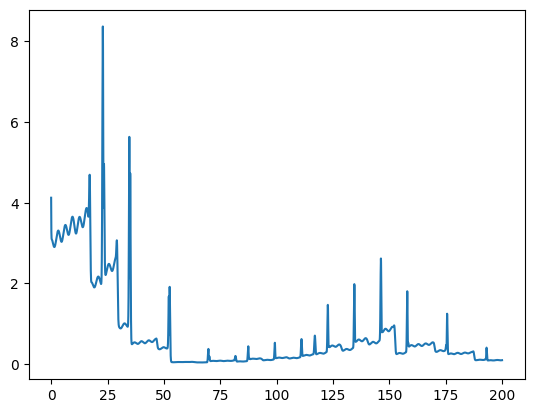

In [ ]:
#Sync Error vs Time
plt.plot(t,[math.sqrt(pow(x1-x2,2)+pow(y1-y2,2)+pow(z1 - z2,2)) for x1,x2,y1,y2,z1, z2 in zip(x_1,x_2,y_1,y_2,z_1, z_2)])

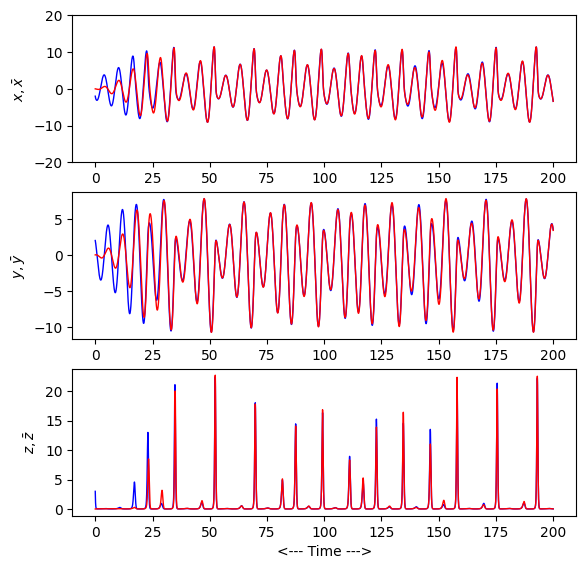

In [ ]:
plt.figure (figsize = (6.5,6.5))
plt.subplot(3,1,1)
plt.plot ( t, x_1, linewidth = 1, color = 'b' )
plt.plot ( t, x_2, linewidth = 1, color = 'r' )
plt.ylim(-20, 20)
plt.ylabel ( r'$x,\bar{x}$')

plt.subplot(3,1,2)
plt.plot ( t, y_1, linewidth = 1, color = 'b' )
plt.plot ( t, y_2, linewidth = 1, color = 'r' )
#plt.ylim(-30, 30)
plt.ylabel ( r'$y,\bar{y}$')

plt.subplot(3,1,3)
plt.plot ( t, z_1, linewidth = 1, color = 'b' )
plt.plot ( t, z_2, linewidth = 1, color = 'r' )
plt.xlabel ( '<--- Time --->' )
plt.ylabel ( r'$z,\bar{z}$')
#plt.ylim(0, 45)
plt.show ( )

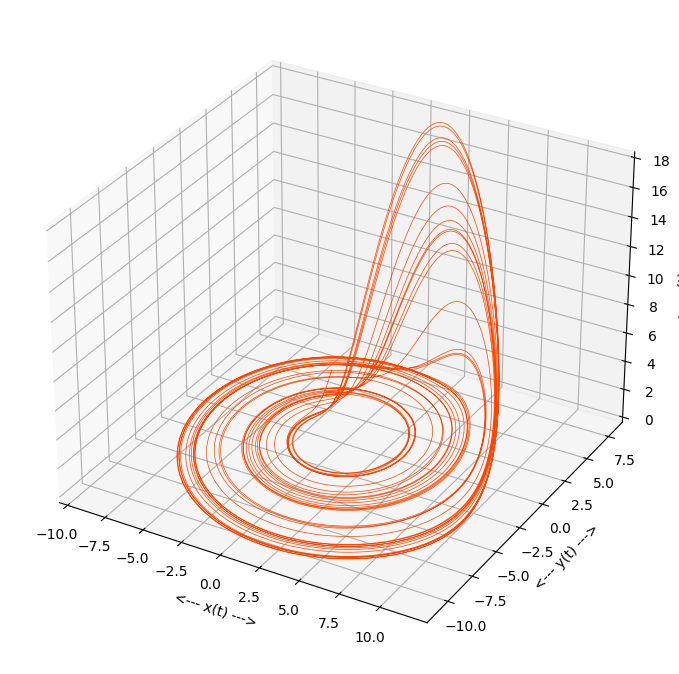

In [ ]:
Rossler_ode_plot_3d(x_1,y_1,z_1)

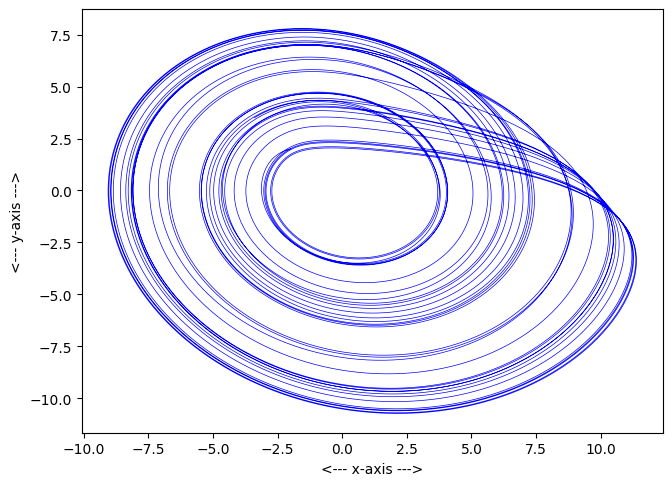

In [ ]:
plt.figure ( figsize = (7.5,5.5))
plt.plot ( x_1, y_1, linewidth = 0.5, color = 'b' )
plt.xlabel ( '<--- x-axis --->' )
plt.ylabel ( '<--- y-axis --->' )
plt.savefig('Rossler_2d.pdf', format='pdf')